In [2]:
import pandas as pd


X_train_scaled = pd.read_csv('X_train_scaled.csv')

X_test_scaled = pd.read_csv('X_test_scaled.csv')

y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train.values.ravel())
y_test_encoded = le.transform(y_test.values.ravel())

model = Sequential()

model.add(Dense(128, input_shape=(X_train_scaled.shape[1],), activation='relu', kernel_regularizer=l2(0.001)))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
]

import time
import pandas as pd
from sklearn.metrics import accuracy_score

# Initialize a list to hold the results
results = []

# Measure the start time for the training process
start_time = time.time()

# Train the neural network model
history = model.fit(X_train_scaled, y_train_encoded,
                    validation_data=(X_test_scaled, y_test_encoded),
                    epochs=100, batch_size=32, callbacks=callbacks)

# Evaluate the model on the training data
train_loss, train_acc = model.evaluate(X_train_scaled, y_train_encoded)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_encoded)

print(f'Training Accuracy: {train_acc}')
print(f'Test Accuracy: {test_acc}')

# Measure the runtime for the entire process
runtime_nn = time.time() - start_time





/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5636 - loss: 0.9150 - val_accuracy: 0.7428 - val_loss: 0.7612
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6950 - loss: 0.7702 - val_accuracy: 0.7926 - val_loss: 0.6658
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7620 - loss: 0.6886 - val_accuracy: 0.8006 - val_loss: 0.6303
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7999 - loss: 0.6578 - val_accuracy: 0.8039 - val_loss: 0.6042
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8101 - loss: 0.6014 - val_accuracy: 0.8248 - val_loss: 0.5720
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8043 - loss: 0.5899 - val_accuracy: 0.8248 - val_loss: 0.5595
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8154 - loss: 0.5742 - val_accuracy: 0.8199 - val_loss: 0.5442
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8129 - loss: 0.5622 - val_accuracy: 0.8248 - 

In [4]:
# Since cross-validation is typically more complex with neural networks due to the retraining requirement,
# we will approximate it using the validation accuracy obtained during training.
# Append the results to the results list
results.append({
    'Model': 'Neural Network',
    'Runtime (s)': runtime_nn,
    'Training Accuracy': train_acc,
    'Test Accuracy': test_acc,
    'Cross-Validation Accuracy': max(history.history['val_accuracy'])  # Using the best validation accuracy
})

# Create DataFrame to display results
results_df = pd.DataFrame(results)
print(results_df)


            Model  Runtime (s)  Training Accuracy  Test Accuracy  \
0  Neural Network    34.239775            0.98029       0.954984   

   Cross-Validation Accuracy  
0                   0.961415  


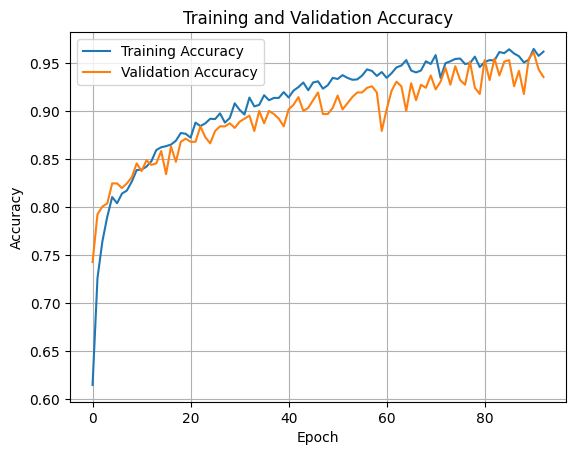

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print(results_df)

               Model  Training Time (s)  Train Accuracy  Test Accuracy  \
0      Random Forest           2.928325             1.0       0.914791   
1            XGBoost           0.591687             1.0       0.966238   
2           LightGBM           0.331195             1.0       0.975884   
3  Weighted Ensemble           1.822965             1.0       0.969453   

   Cross-Validation Accuracy  
0                   0.913912  
1                   0.962989  
2                   0.967013  
3                   0.964600  


In [ ]:
import numpy as np
import cv2
from skimage.feature import hog, graycomatrix, graycoprops
from scipy.stats import entropy, skew, kurtosis
from skimage.measure import moments_hu, label, regionprops

def extract_features_from_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image {image_path}")
        return None

    original_height, original_width = image.shape[:2]

    # Resize the image
    image_resized = cv2.resize(image, (100, 100))

    # Convert to grayscale for some features
    image_gray = cv2.cvtColor(image_resized, cv2.COLOR_RGB2GRAY)
    image_resized_gray = cv2.resize(image_gray, (100, 100))

    # HOG features
    hog_features = hog(image_gray, orientations=8, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=False)
    hog_mean = np.mean(hog_features)
    hog_std = np.std(hog_features)

    # Texture features from grayscale
    glcm = graycomatrix(image_resized_gray, [5], [0], symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    ASM = graycoprops(glcm, 'ASM')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    entropy_value = entropy(image_resized_gray.ravel())
    mean_intensity = np.mean(image_resized_gray)
    std_intensity = np.std(image_resized_gray)
    skewness_intensity = skew(image_resized_gray.ravel())
    kurtosis_intensity = kurtosis(image_resized_gray.ravel())

    # Shape features
    edges = cv2.Canny(image_gray, 100, 200)
    num_centromeres = len(regionprops(label(edges)))
    chrom_length = original_height - 2
    aspect_ratio = original_height / original_width

    # Hu Moments
    moments = moments_hu(image_gray)
    hu_moments = [m for m in moments]

    # Edge-based features
    _, binary_image = cv2.threshold(image_resized_gray, 20, 255, cv2.THRESH_BINARY)

    # Contour-based features
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    total_edge_pixels = np.sum([cv2.contourArea(contour) for contour in contours])
    edge_density = total_edge_pixels / (original_height * original_width)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        perimeter_length = cv2.arcLength(largest_contour, True)
        solidity = cv2.contourArea(largest_contour) / cv2.contourArea(cv2.convexHull(largest_contour))
    else:
        perimeter_length = 1
        solidity = 0

    # Color features
    mean_color = np.mean(image_resized, axis=(0, 1))
    std_color = np.std(image_resized, axis=(0, 1))

    features = {
        'hog_mean': hog_mean,
        'hog_std': hog_std,
        'contrast': contrast,
        'dissimilarity': dissimilarity,
        'homogeneity': homogeneity,
        'ASM': ASM,
        'energy': energy,
        'correlation': correlation,
        'entropy': entropy_value,
        'mean_intensity': mean_intensity,
        'std_intensity': std_intensity,
        'skewness_intensity': skewness_intensity,
        'kurtosis_intensity': kurtosis_intensity,
        'aspect_ratio': aspect_ratio,
        'edge_density': edge_density,
        'solidity': solidity,
        'mean_color_R': mean_color[0],
        'std_color_R': std_color[0],
    }

    return features
